# Maquina de soporte de vectores


# Importando datos

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle

CATEGORIES = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","nn","o","p","q","r","s","t","u","v","w","x","y","z"]

In [2]:
pickle_in = open("svm.pickle","rb")
data = pickle.load(pickle_in)
random.shuffle(data)
features =[]
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)


In [3]:
#dividiendo datos en entrenamiento y test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size= 0.5)

# Creacion y entrenamiento del modelo

In [4]:
#Creando el modelo
from sklearn import datasets, svm, metrics
clf = svm.SVC(kernel='poly', gamma='auto')


In [5]:
clf.fit(xtrain, ytrain)

SVC(gamma='auto', kernel='poly')

In [6]:
from mpl_toolkits import mplot3d
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = clf.score(xtest, ytest)
print(score)
ypred = clf.predict(xtest)



0.9477947794779478


# Matriz de confusion

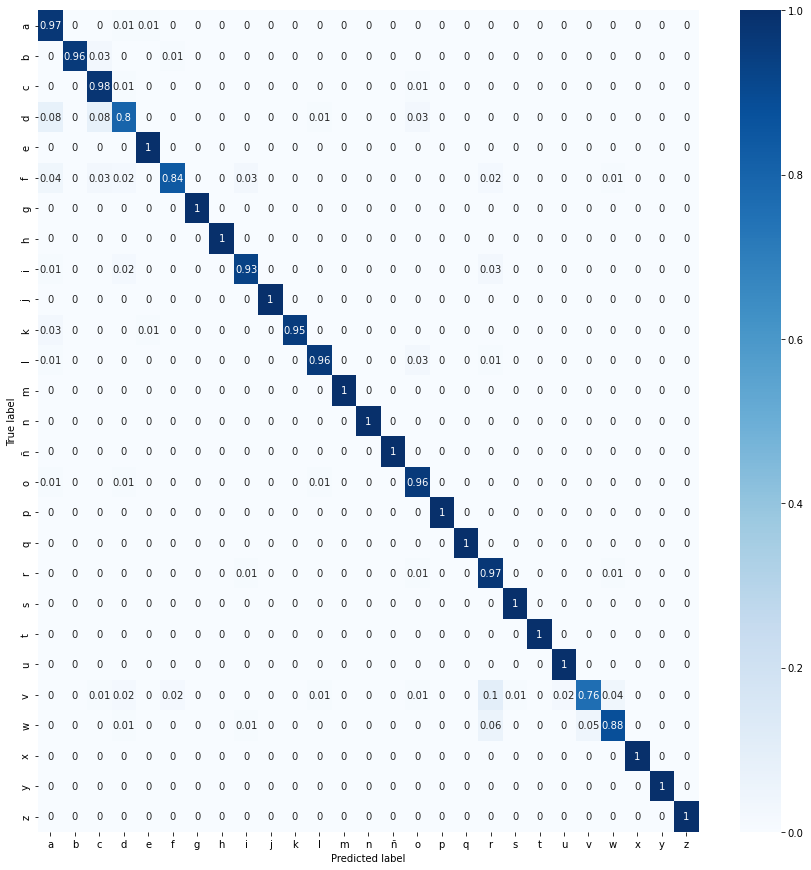

In [10]:
import pathlib

import seaborn as sns
import tensorflow as tf
import pandas as pd                     

from IPython import display

classes=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","ñ","o","p","q","r","s","t","u","v","w","x","y","z"]
con_mat = tf.math.confusion_matrix(labels=ytest, predictions=ypred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(12, 12))

sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Probar datos diferentes

La seña es: w


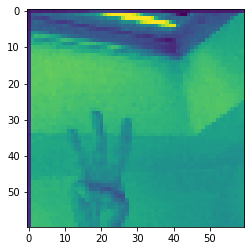

In [20]:
numero = 1
plt.imshow(xtest[numero].reshape(60, 60))
print("La seña es:",CATEGORIES[(ypred[numero])])